## 导入库

In [1]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from Bio import SeqIO
%matplotlib inline

## 计算Fasta格式文件中有多少条序列

In [2]:
def num_of_samples(filename):
    k = 0
    for r in SeqIO.parse(filename,'fasta'):
        k += 1
    return k
    

### 绘制序列长度分布柱状图

In [15]:
def draw_bar(labels,quants):
    n = len(labels)
    width = 0.8
    ind = np.linspace(0.5,11.5,n)
    # make a square figure
    fig = plt.figure(1)
    ax  = fig.add_subplot(111)
    # Bar Plot
    ax.bar(ind-width/2,quants,width,color='green')
    # Set the ticks on x-axis
    ax.set_xticks(ind)
    ax.set_xticklabels(labels)
    # labels
    ax.set_xlabel('Length of Sequence')
    ax.set_ylabel('Numbers of Sequnece')
    # title
    ax.set_title('Distribute of Sequence', bbox={'facecolor':'0.8', 'pad':5})
    plt.grid(True)
    plt.show()
    plt.savefig("bar.jpg")
    plt.close()

## 统计AMP正样本集序列长度区间分布

In [13]:
# 读取正样本序列的长度到字典中，字典形如：length of sequence: numbers of sequence
def stast_len_distribution(filename,lendist):
    amp_len_dict={}
    for r in SeqIO.parse(filename,'fasta'):
        k = len(r.seq)
        amp_len_dict[k] = amp_len_dict.get(k,0)+1

    # 统计序列长度分布
    n = len(lendist)
    amp_len_list = list(amp_len_dict.items())
    amp_len_list.sort(key=lambda x:x[0], reverse=True)
    amp_len_dist = np.zeros(n+1)
    for s in amp_len_list:
        i = n-1
        while i >= 0:
            if s[0] > lendist[i]:
                amp_len_dist[i+1] += s[1]
                break
            i -= 1
        if i == -1:
            amp_len_dist[0] += s[1]

    return amp_len_dist

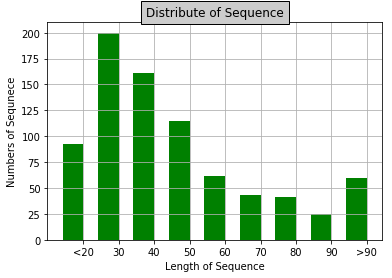

In [16]:
lendist = [20,30,40,50,60,70,80,90]
amp_len_dist = stast_len_distribution('AMPs_50',lendist)
labels= ['<20', '30', '40', '50', '60', '70', '80', '90', '>90']
draw_bar(labels,amp_len_dist)


In [21]:
# X的累积和
def accumulate(X):
    ax = np.zeros(len(X))
    ax[0] = X[0]
    i = 1
    while i<len(X):
        ax[i] = ax[i-1] + X[i]
        i += 1
    return ax

In [17]:
lendist = [20,30,40,50,60,70,80,90,100,110,120]
amp_len_dist = stast_len_distribution('AMPs_50',lendist)

In [25]:
ax = accumulate(amp_len_dist)
print(amp_len_dist)
print(ax)
print(ax/8)
# 长度<=50的序列占71%，长度在50~90的序列占21%，长度>90的序列占8%》

[ 93. 200. 161. 115.  62.  43.  41.  25.  18.  12.   5.  25.]
[ 93. 293. 454. 569. 631. 674. 715. 740. 758. 770. 775. 800.]
[ 11.625  36.625  56.75   71.125  78.875  84.25   89.375  92.5    94.75
  96.25   96.875 100.   ]


## 统计负样本集序列长度分布区间

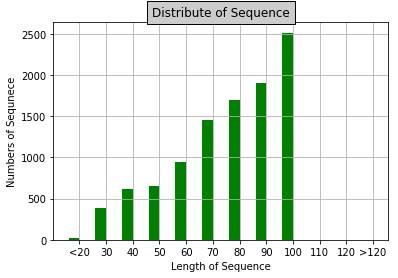

In [8]:
notAmp_len_dist = stast_len_distribution('notAMPs-100aas_50',lendist)
draw_bar(labels,notAmp_len_dist)

## 从非AMP样本中随机选取800个序列。其中长度<=50的序列占71%，长度在50~90的序列占21%，长度>90的序列占8%

In [26]:
notAMPSequs_all = {}
for record in SeqIO.parse('notAMPs-100aas_50', 'fasta'):
    notAMPSequs_all[record.id] = str(record.seq)

In [27]:
import random as rm
rm.seed(100)
all_items = list(notAMPSequs_all.items())


10194

In [31]:
N = len(all_items)
n_50 = int(800*0.71)
n_90 = int(800*0.21)
n_100 = 800 - (n_50+n_90)
print(n_50,n_90,n_100)

568 168 64


In [ ]:
import random as rm 

rm.seed(20)
items = list(notAMPSequs.items())
notAMP = rm.sample(items,800)
n = 0
ndict={}
for r in notAMP:
    n += 1
    k = len(r[1])
    ndict[k] = ndict.get(k,0)+1
lenitems = list(ndict.items())
lenitems.sort(key=lambda x: x[0],reverse=True)
for t in lenitems:
    print("length {}: ->{}".format(t[0],t[1]))

In [ ]:
notAMP

In [ ]:
items = list(ndict.items())
items.sort(key=lambda x:x[0], reverse=True)
for t in items:
    print("length {}: ->{}".format(t[0],t[1]))